### pandas study

학습 날짜 : 2019년 04월 07일

학습 내용 : pandas 기본 및 join 기능

학습 이유 : 까먹어서

학습 참고 : https://github.com/cionman/Python_pandas/blob/master/pandas_ex.ipynb

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

%matplotlib inline

In [3]:
# Pandas의 고유의 데이터 타입 Series 1차원 배열

s = pd.Series(["m", "i", "k", "u", 3, 9, 39, 3.939])
s

0        m
1        i
2        k
3        u
4        3
5        9
6       39
7    3.939
dtype: object

In [4]:
# index 파라미터를 이용해 임의의 문자열 인덱스를 설정

s = pd.Series(["m", "i", "k", "u", 3, 9, 39, 3.939], index=["A","B","Z","X", "y", "h", "i", "D" ])
s

A        m
B        i
Z        k
X        u
y        3
h        9
i       39
D    3.939
dtype: object

In [5]:
heroes_dict = {
    'ana':200, 
    'bastion':300, 
    'dva':500, 
    'genji':200, 
    'hanjo':200, 
    'junkrat':200, 
    'lucio':200, 
    'macree':200, 
    'mei':250, 
    'mercy':200, 
    'pharah':200, 
    'reaper':250, 
    'reinhardt':500, 
    'roadhog':600, 
    'soldier76':200, 
    'symmetra':200, 
    'torbjorn':200, 
    'tracer':150, 
    'widowmaker':200, 
    'winston':500, 
    'zarya':400, 
    'zenyatta':200 
}

In [7]:
heroes_series = pd.Series(heroes_dict)
heroes_series

ana           200
bastion       300
dva           500
genji         200
hanjo         200
junkrat       200
lucio         200
macree        200
mei           250
mercy         200
pharah        200
reaper        250
reinhardt     500
roadhog       600
soldier76     200
symmetra      200
torbjorn      200
tracer        150
widowmaker    200
winston       500
zarya         400
zenyatta      200
dtype: int64

In [9]:
heroes = { "name":[ 'ana', 'bastion', 'dva', 'genji', 'hanjo', 'junkrat', 'lucio', 'macree', 'mei', 'mercy', 'pharah', 'reaper', 
                   'reinhardt', 'roadhog', 'soldier76', 'symmetra', 'torbjorn', 'tracer', 'widowmaker', 'winston', 'zarya', 'zenyatta' ], 
          "health":[ 200, 300, 500, 200, 200, 200, 200, 200, 250, 200, 200, 250, 500, 600, 200, 200, 200, 150, 200, 500, 400, 200 ], 
          "position":[ "support", "defense", "tank", "offense", "defense", "defense", "support", "offense", "defense", "support", "offense", 
                      "offense", "tank", "tank", "offense", "support", "defense", "offense", "defense", "tank", "tank","support" ], 
          "id":[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22 ] }

In [10]:
heroes_df = pd.DataFrame(heroes)
heroes_df

,name,health,position,id
0,ana,200,support,1
1,bastion,300,defense,2
2,dva,500,tank,3
3,genji,200,offense,4
4,hanjo,200,defense,5
5,junkrat,200,defense,6
6,lucio,200,support,7
7,macree,200,offense,8
8,mei,250,defense,9
9,mercy,200,support,10


In [11]:
# csv파일 읽어오기
csv_data = pd.read_csv("examples/book_list.csv")

In [13]:
csv_data.head()

,book_title,book_author,book_translator,book_pub_date,book_isbn
0,러닝 리액트,"알렉스 뱅크스 , 이브 포셀로",오현석,2018-02-13,9.791162e+12
1,저는 차트분석이 처음인데요 최신개정판,강병욱,2018-01-22,344 쪽,3.190000e+03
2,HOW TO WALK,틱낫한,진우기,2018-01-29,9.791158e+12
3,HOW TO RELAX,틱낫한,진우기,2018-01-29,9.791158e+12
4,HOW TO 시리즈(세트),틱낫한,진우기,2018-01-29,9.791158e+12


In [15]:
csv_data2 = pd.read_csv("examples/book_list.csv", names = ["제목", "저자", "역자", "발행일", "ISBN"], header=0)
csv_data2.head()

,제목,저자,역자,발행일,ISBN
0,러닝 리액트,"알렉스 뱅크스 , 이브 포셀로",오현석,2018-02-13,9.791162e+12
1,저는 차트분석이 처음인데요 최신개정판,강병욱,2018-01-22,344 쪽,3.190000e+03
2,HOW TO WALK,틱낫한,진우기,2018-01-29,9.791158e+12
3,HOW TO RELAX,틱낫한,진우기,2018-01-29,9.791158e+12
4,HOW TO 시리즈(세트),틱낫한,진우기,2018-01-29,9.791158e+12


In [19]:
conn = sqlite3.connect('examples/db.sqlite')
q = 'SELECT * FROM hanbit_books'
# Database 안에 데이터를 DataFrame으로
sql_df = pd.read_sql(q, con = conn)
sql_df.head()

,title,author,translator,pub_date,isbn
0,러닝 리액트,"알렉스 뱅크스 , 이브 포셀로",오현석,2018-02-13,9791162240373
1,저는 차트분석이 처음인데요 최신개정판,강병욱,2018-01-22,344 쪽,3190
2,HOW TO WALK,틱낫한,진우기,2018-01-29,9791157842285
3,HOW TO RELAX,틱낫한,진우기,2018-01-29,9791157842261
4,HOW TO 시리즈(세트),틱낫한,진우기,2018-01-29,9791157842230


In [20]:
heroes_df[["name", "position"]]

,name,position
0,ana,support
1,bastion,defense
2,dva,tank
3,genji,offense
4,hanjo,defense
5,junkrat,defense
6,lucio,support
7,macree,offense
8,mei,defense
9,mercy,support


In [21]:
# 데이터를 가져올때는 불리언 인덱싱 이라는 방법으로 [] 안에 들어가는 조건을 기준으로 데이터 프레임 안의 각 열을 순회 하며 검사
heroes_df[heroes_df.health == 250]

,name,health,position,id
8,mei,250,defense,9
11,reaper,250,offense,12


In [22]:
# Series 타입 데이터 중 200 이상의 값을 선택 
heroes_series[heroes_series >= 200]

ana           200
bastion       300
dva           500
genji         200
hanjo         200
junkrat       200
lucio         200
macree        200
mei           250
mercy         200
pharah        200
reaper        250
reinhardt     500
roadhog       600
soldier76     200
symmetra      200
torbjorn      200
widowmaker    200
winston       500
zarya         400
zenyatta      200
dtype: int64

In [24]:
# position이 열값이 defense이면서 name이 bastion 인 값 선택
# 여러개 설정할 때 &, | 를 한 글자만 써야함
heroes_df[(heroes_df.position == 'defense') & (heroes_df.name=='bastion')]

,name,health,position,id
1,bastion,300,defense,2


In [26]:
heroes_df['name'].head()

0        ana
1    bastion
2        dva
3      genji
4      hanjo
Name: name, dtype: object

In [28]:
heroes_df.name.head()

0        ana
1    bastion
2        dva
3      genji
4      hanjo
Name: name, dtype: object

In [29]:
# 인덱스를 id라는 열로 변경함

heroes_df.set_index('id',inplace=True)
heroes_df.head()

,name,health,position
id,,,
1,ana,200,support
2,bastion,300,defense
3,dva,500,tank
4,genji,200,offense
5,hanjo,200,defense


In [34]:
heroes_df.loc[0:4, ['name', 'health']]

,name,health
id,,
1,ana,200
2,bastion,300
3,dva,500
4,genji,200


In [35]:
t1 = pd.DataFrame({
    "id" : [1,2,3,4,5],
    "left_val" : ["a", "b", "c","d","e"]
})
t1

,id,left_val
0,1,a
1,2,b
2,3,c
3,4,d
4,5,e


In [37]:
t2 = pd.DataFrame({
    "id" : [3,4,5,6,7],
    "right_val" : ["a", "w", "e", "r", "t"]
})
t2

,id,right_val
0,3,a
1,4,w
2,5,e
3,6,r
4,7,t


In [38]:
# merge는 SQL의 Join
pd.merge(t1, t2)

,id,left_val,right_val
0,3,c,a
1,4,d,w
2,5,e,e


In [39]:
pd.merge(t1, t2, on = 'id')

,id,left_val,right_val
0,3,c,a
1,4,d,w
2,5,e,e


In [40]:
pd.merge(t1, t2, left_on='left_val', right_on='right_val')

,id_x,left_val,id_y,right_val
0,1,a,3,a
1,5,e,5,e


In [42]:
# concat 은 SQL 의 union All

t3 = pd.DataFrame({
    "uid" : [1, 2, 3, 4, 5, 6],
    "value" : ["aa", "bb", "cc", "dd", "ee", "ff"]
})

t4 = pd.DataFrame({
    "uid" : [11, 22, 33, 44, 55, 66],
    "value" : ["aaa", "bbb", "ccc", "ddd", "eee", "fff"]
})

In [44]:
pd.concat([t3, t4])

,uid,value
0,1,aa
1,2,bb
2,3,cc
3,4,dd
4,5,ee
5,6,ff
0,11,aaa
1,22,bbb
2,33,ccc
3,44,ddd


In [46]:
dummy_data = pd.read_csv('examples/dummy.csv')
dummy_data.head()

,id,gender,contry,date,level,version
0,1,Female,Czech Republic,2016-06-11,71,5.1.6
1,2,Male,Ukraine,2016-09-07,58,0.2.5
2,3,Female,Philippines,2016-03-26,18,7.1.9
3,4,Male,Greece,2016-03-23,88,0.4.4
4,5,Male,Indonesia,2016-08-07,21,9.0.7


In [47]:
dummy_data['df_date'] = pd.to_datetime(dummy_data['date'])
dummy_data.head()

,id,gender,contry,date,level,version,df_date
0,1,Female,Czech Republic,2016-06-11,71,5.1.6,2016-06-11
1,2,Male,Ukraine,2016-09-07,58,0.2.5,2016-09-07
2,3,Female,Philippines,2016-03-26,18,7.1.9,2016-03-26
3,4,Male,Greece,2016-03-23,88,0.4.4,2016-03-23
4,5,Male,Indonesia,2016-08-07,21,9.0.7,2016-08-07


In [52]:
df = pd.DataFrame({'year': [2015, 2016],
                       'month': [2, 3],
                       'day': [4, 5]})

pd.to_datetime(df)

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [54]:
by_country = dummy_data.groupby('contry')
by_country

In [55]:
by_country.count().head()

,id,gender,date,level,version,df_date
contry,,,,,,
Afghanistan,2,2,2,2,2,2
Albania,5,5,5,5,5,5
Argentina,15,15,15,15,15,15
Armenia,7,7,7,7,7,7
Australia,2,2,2,2,2,2


In [56]:
# 그룹 각 열의 최소
by_country.min()

,id,gender,date,level,version,df_date
contry,,,,,,
Afghanistan,438,Male,2015-11-08,71,0.14,2015-11-08
Albania,212,Female,2015-10-24,28,0.2.6,2015-10-24
Argentina,121,Female,2015-09-20,11,0.11,2015-09-20
Armenia,205,Female,2015-12-03,23,0.22,2015-12-03
Australia,16,Female,2015-11-22,65,0.7.1,2015-11-22
Azerbaijan,28,Male,2016-06-12,28,2.06,2016-06-12
Bangladesh,689,Male,2016-07-17,100,0.5.0,2016-07-17
Belarus,364,Female,2015-09-17,65,0.8.8,2015-09-17
Belgium,598,Male,2015-10-01,18,3.6.7,2015-10-01


In [57]:
multi_indexed = heroes_df.groupby(['position', 'health'])
multi_indexed

In [58]:
multi_indexed.describe()

name                       
                count unique        top freq
position health                             
defense  200        4      4   torbjorn    1
         250        1      1        mei    1
         300        1      1    bastion    1
offense  150        1      1     tracer    1
         200        4      4     macree    1
         250        1      1     reaper    1
support  200        5      5        ana    1
tank     400        1      1      zarya    1
         500        3      3  reinhardt    1
         600        1      1    roadhog    1

In [60]:
by_country.describe().head()

id                                                        \
            count        mean         std    min     25%    50%     75%   
contry                                                                    
Afghanistan   2.0  460.500000   31.819805  438.0  449.25  460.5  471.75   
Albania       5.0  634.800000  265.387829  212.0  615.00  672.0  740.00   
Argentina    15.0  484.266667  271.686391  121.0  274.50  437.0  697.00   
Armenia       7.0  691.428571  249.030023  205.0  625.00  730.0  842.50   
Australia     2.0  114.500000  139.300036   16.0   65.25  114.5  163.75   

                   level                                                       
               max count       mean        std   min   25%   50%   75%    max  
contry                                                                         
Afghanistan  483.0   2.0  75.000000   5.656854  71.0  73.0  75.0  77.0   79.0  
Albania      935.0   5.0  53.800000  20.596116  28.0  36.0  61.0  72.0   72.0  
Argentina    982.0  15.0  50.466667  27.756252  11.0  27.5  51.0  65.0  100.0  
Armenia      970.0   7.0  61.428571  28.371683  23.0  45.5  59.0  78.5  100.0  
Australia    213.0   2.0  81.000000  22.627417  65.0  73.0  81.0  89.0   97.0

In [61]:
by_country.get_group('South Korea')

,id,gender,contry,date,level,version,df_date
38,39,Female,South Korea,2016-08-11,19,0.99,2016-08-11
189,190,Male,South Korea,2016-08-25,66,0.74,2016-08-25
734,735,Male,South Korea,2016-08-21,34,4.9,2016-08-21


In [62]:
by_country.agg({
    'level' : [("합계", np.sum), np.mean]
})

level                               
                             합계 <function mean at 0x10bf3bea0>
contry                                                        
Afghanistan                 150                      75.000000
Albania                     269                      53.800000
Argentina                   757                      50.466667
Armenia                     430                      61.428571
Australia                   162                      81.000000
Azerbaijan                   96                      48.000000
Bangladesh                  100                     100.000000
Belarus                     223                      74.333333
Belgium                      18                      18.000000
Benin                        21                      21.000000
Bhutan                       93                      93.000000
Bolivia                     328                      54.666667
Bosnia and Herzegovina      104                      52.000000
Brazil                     2002                      50.050000
Bulgaria                    131                      32.750000
Burkina Faso                163                      81.500000
Cambodia                     28                      28.000000
Cameroon                    320                      64.000000
Canada                      583                      44.846154
Chile                       347                      69.400000
China                     10153                      53.436842
Colombia                    475                      52.777778
Comoros                      70                      70.000000
Costa Rica                  303                      43.285714
Croatia                     454                      64.857143
Cuba                        100                      50.000000
Cyprus                       50                      50.000000
Czech Republic              709                      41.705882
Denmark                      90                      45.000000
Dominican Republic          165                      41.250000
...                         ...                            ...
Sierra Leone                147                      73.500000
Slovenia                     87                      21.750000
South Africa                 57                      57.000000
South Korea                 119                      39.666667
Spain                       167                      41.750000
Sri Lanka                    77                      38.500000
Sudan                        25                      25.000000
Sweden                     1318                      48.814815
Switzerland                  95                      95.000000
Syria                       253                      63.250000
Tajikistan                   60                      30.000000
Tanzania                     78                      39.000000
Thailand                    812                      50.750000
Tonga                        89                      89.000000
Trinidad and Tobago           2                       2.000000
Tunisia                      95                      95.000000
Turks and Caicos Islands     74                      74.000000
Uganda                      255                      85.000000
Ukraine                     506                      46.000000
United Kingdom              124                      62.000000
United States              1089                      51.857143
Uruguay                      95                      47.500000
Uzbekistan                  124                      41.333333
Vanuatu                      15                      15.000000
Venezuela                   263                      43.833333
Vietnam                     344                      49.142857
Wallis and Futuna            90                      90.000000
Yemen                       207                      51.750000
Zambia                       89                      89.000000
Zimbabwe                     94                      94.0

In [63]:
heroes_df.set_index('name', inplace=True)
heroes_df


,health,position
name,,
tracer,150,offense
ana,200,support
widowmaker,200,defense
torbjorn,200,defense
symmetra,200,support
soldier76,200,offense
mercy,200,support
pharah,200,offense
lucio,200,support


In [64]:
heroes_df.sort_values(by='health', inplace=True)
heroes_df

,health,position
name,,
tracer,150,offense
zenyatta,200,support
macree,200,offense
genji,200,offense
junkrat,200,defense
lucio,200,support
pharah,200,offense
hanjo,200,defense
soldier76,200,offense


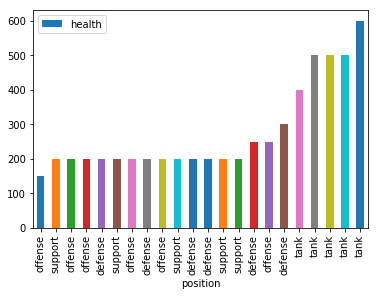

In [65]:
heroes_df.plot(kind='bar', x='position', y='health')